In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from confusion_matrix_plot import plot_confusion_matrix
from image_plot import plot_images

In [3]:
train_path = 'data/MobileNet Samples/Sign Language Samples/train'
valid_path = 'data/MobileNet Samples/Sign Language Samples/valid'
test_path = 'data/MobileNet Samples/Sign Language Samples/test'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
    .flow_from_directory(directory=train_path, target_size=(224, 224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
    .flow_from_directory(directory=valid_path, target_size=(224, 224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
    .flow_from_directory(directory=test_path, target_size=(224, 224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [4]:
# MODEL

In [5]:
mobile_model = tf.keras.applications.mobilenet.MobileNet()

In [6]:
mobile_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [14]:
# we store all layers till the 6th from the end (including this layer in the module function)
# .output means that it is a functional module type
x = mobile_model.layers[-6].output
# We pass all of the previous layers into the output Dense layer
# The functional module x works as the input (containing all previous layers) to the output layer
output = Dense(units=10, activation='softmax')(x)

In [8]:
mobile_model = Model(
    inputs=mobile_model.input,
    outputs=output)

In [9]:
# Freeze all of the last 23 layers (set this parameter by yourself)
for layer in mobile_model.layers[:-23]:
    layer.trainable = False

In [10]:
mobile_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [24]:
#TRAIN MODEL

In [11]:
mobile_model.compile(
    Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
mobile_model.fit(
    x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=40,
    verbose=2
)

Epoch 1/40
172/172 - 6s - loss: 0.6211 - accuracy: 0.8224 - val_loss: 0.3577 - val_accuracy: 0.8733
Epoch 2/40
172/172 - 5s - loss: 0.1260 - accuracy: 0.9766 - val_loss: 0.0790 - val_accuracy: 0.9833
Epoch 3/40
172/172 - 6s - loss: 0.0579 - accuracy: 0.9959 - val_loss: 0.0491 - val_accuracy: 0.9933
Epoch 4/40
172/172 - 6s - loss: 0.0300 - accuracy: 0.9977 - val_loss: 0.0417 - val_accuracy: 0.9933
Epoch 5/40
172/172 - 6s - loss: 0.0205 - accuracy: 0.9988 - val_loss: 0.0343 - val_accuracy: 0.9933
Epoch 6/40
172/172 - 6s - loss: 0.0245 - accuracy: 0.9965 - val_loss: 0.0343 - val_accuracy: 0.9933
Epoch 7/40
172/172 - 6s - loss: 0.0146 - accuracy: 0.9994 - val_loss: 0.0280 - val_accuracy: 0.9933
Epoch 8/40
172/172 - 6s - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0277 - val_accuracy: 0.9933
Epoch 9/40
172/172 - 6s - loss: 0.0091 - accuracy: 0.9988 - val_loss: 0.0250 - val_accuracy: 0.9933
Epoch 10/40
172/172 - 6s - loss: 0.0115 - accuracy: 0.9977 - val_loss: 0.0451 - val_accuracy: 0.9867

In [28]:
# PREDICTIONS

In [16]:
test_labels = test_batches.classes

In [17]:
predictions = mobile_model.predict(
    x=test_batches,
    steps=len(test_batches),
    verbose=0
)

In [18]:
confusionMatrix = confusion_matrix(
    y_true=test_labels,
    y_pred=predictions.argmax(axis=1)
)

In [19]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [20]:
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 1 4 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


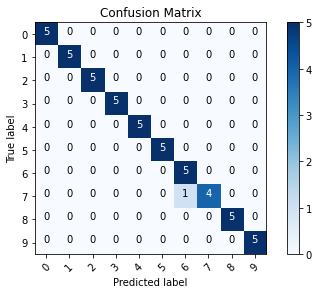

In [21]:
plot_confusion_matrix(
    cm=confusionMatrix,
    classes=cm_plot_labels,
    title='Confusion Matrix'
)